# Physics 641 - Homework 3

## Tucker Knaak - Department of Physics, Creighton University - Spring 2024

### Problem 3.36: Monte Carlo simulation of a one-dimensional random walk.
#### We average over many walkers (trials), where each trial consists of an $N$-step walk, and construct a histogram for the number of times that the displacement $x$ is found.  The probability that the walker is a distance $x$ from the origin after $N$ steps is proportional to the corresponding value of the histogram.  This procedure is called $\textit{Monte Carlo}$ sampling.

#### (a) Is the value of $x$ for one trial of any interest?  Why do we have to average over many trials?

#### (b) Will we obtain the exact answer for the probability distribution by doing a Monte Carlo simulation?

#### (c) Describe the changes of the histogram for larger values of $N$ and $p=1/2$.

#### (d) What is the most probable value of $x$ for $p=1/2$ and $N=16$ and $N=32$?  What is the approximate width of the distribution?  Estimate the width visually.  One way to do so is to determine the value of $x$ at which the value of the histogram is one-half of its maximum value.  How does the width change as a function of $N$ for fixed $p$?

#### (e) How does the histogram change, if at all, as the number of walkers increases for $N=4$?

### Problem 3.70: Watching a drunkard.  
#### A random walker is observed to take a total of $N$ steps, $n$ of which are to the right.

#### (a) Suppose that a curious observer finds that on ten successive nights the walker takes $N=20$ steps and that the values of $n$ are given sucessively by 14, 13, 11, 12, 11, 12, 16, 16, 14, 8.  Calculate $\bar{n}$, $\bar{n^2}$, and $\sigma_n$.  You can use this information to make two estimates for $p$, which estimate is likely to be the most accurate?

#### (b) Suppose that on another ten successive nights the same walker takes $N=100$ steps and that the values of $n$ are given by 58, 69, 71, 58, 63, 53, 64, 66, 65, 50.  Calculate the same quantities as in part (a) and use this information to estimate $p$.  How does the ratio of $\sigma_n$ to $\bar{n}$ compare for the two values of $N$?  Explain your results.

#### (c) Calculate $\bar{m}$ and $\sigma_m$, where $m\equiv n-n^{\prime}$ is the net displacement of the walker for parts (a) and (b).

In [1]:
'''Required Libraries'''
import matplotlib.pyplot as plt
import numpy as np

#### This cell includes the class necessary to compute the random walks and Monte Carlo simulations for the problem.

In [2]:
class bernoulli_processes():
        
    '''Function to simulate a random walk for a given number of steps and
       probablity of moving to the right (p) or moving to the left (q)'''
    def random_walk(self, num_steps: int, p: float, q: float):
        
        '''Set initial displacement'''
        x = 0
        
        '''Loop to determine displacement after num_steps'''
        for step in range(num_steps):
            
            '''Random float in [0, 1)'''
            rnd = np.random.rand()
            
            '''Move to right // move to left'''
            if rnd <= p:
                x += 1
            else:
                x -= 1
                
        '''Return displacement'''
        return x
    
    
    '''Function to calculate the (continuous) probability distribution for the random walk'''
    def probability_distribution(self, num_trials: int, num_steps: int):
        
        '''Create lists to find range of displacements and to store probabilities'''
        disp_list = np.linspace(-num_steps - 1, num_steps + 1, 1000, endpoint = True)
        prob_list = []
        
        '''Loop to calculate probabilities'''
        for x in disp_list:
            prob_list.append(num_trials * (2 / np.sqrt(2 * np.pi * num_steps)) * np.exp(-(x**2) / (2 * num_steps)))
            
        '''Return displacements and probabilities'''
        return disp_list, prob_list
    
        
    '''Function to conduct a Monte Carlo simulation of a random walk for a given number of trials'''
    def monte_carlo(self, num_trials: int, num_steps: int, p: float, q: float,
                    distribution = True, save_fig = True):
        
        '''Displacement for each trial'''
        x_list = [self.random_walk(num_steps, p, q) for trial in range(num_trials)]
        
        '''Set probability distribution'''
        if distribution:
            disp_list, prob_list = self.probability_distribution(num_trials, num_steps)
        
        '''Set various parameters of figure'''
        if num_steps <= 8:
            x_ticks = np.arange(-num_steps, num_steps + 1, 2)        #set x-ticks on figure
        elif num_steps > 8 and num_steps <= 32:
            x_ticks = np.arange(-num_steps, num_steps + 1, 4)        #set x-ticks on figure
        elif num_steps > 32 and num_steps <= 64:
            x_ticks = np.arange(-num_steps, num_steps + 1, 8)        #set x-ticks on figure
        else:
            x_ticks = np.arange(-num_steps, num_steps + 1, 10)       #set x-ticks on figure
        bin_edges = np.arange(-num_steps - 0.5, num_steps + 1.5, 1)  #set number and position of bins
        text1 = f'Trials = {num_trials}\nSteps = {num_steps}'        #labels for first legend
        text2 = f'p = {p:.2f}\nq = {q:.2f}'                          #labels for second legend
    
        '''Create figure and plot results'''
        fig, ax = plt.subplots(1, 1, figsize = (8, 5))
        fig.tight_layout(pad = 2.0)
        plt.subplots_adjust(right = 0.9)
        ax.set_xlabel('$x$')
        ax.set_ylabel('Frequency')
        ax.set_title('Monte Carlo Simulation of Random Walk')
        ax.set_xticks(x_ticks)
        ax.grid(True, linestyle = 'dashed', color = 'darkgray', alpha = 0.25)
        hist_heights, _, _ = ax.hist(x_list, bins = bin_edges, color = plt.cm.viridis(np.random.rand()),
                                     edgecolor = 'black')
        if distribution:
            ax.plot(disp_list, prob_list, linestyle = 'solid', color = 'black')
        ax.annotate(text1, xy = (0.02, 0.95), xycoords = 'axes fraction', ha = 'left', va = 'top',
                    bbox = dict(boxstyle = 'square', edgecolor = 'black', facecolor = 'none'))
        ax.annotate(text2, xy = (0.98, 0.95), xycoords = 'axes fraction', ha = 'right', va = 'top',
                    bbox = dict(boxstyle = 'square', edgecolor = 'black', facecolor = 'none'))
        
        '''Create twin figure with new axes'''
        y_ticks = np.linspace(0, max(hist_heights) / num_trials, 10, endpoint = True)
        ax2 = ax.twinx()
        ax2.set_ylim(0, max(y_ticks))
        ax2.set_yticks(y_ticks)
        ax2.set_yticklabels(f'{y:.2f}' for y in y_ticks)  # Remove ticks and labels
        ax2.set_ylabel('Normalized Frequency')  # Remove y-axis label
        
        '''Save figure'''
        if save_fig == True:
            fig.savefig(f'c:/Users/Tucker Knaak/Downloads/MonteCarlo_{num_trials}Trials_{num_steps}Steps.png')

#### 3.36 (a) Is the value of $x$ for one trial of any interest?  Why do we have to average over many trials?

##### By definition, we need more than one data point to take statistics of the results.  Therefore, the value of $x$ for one trial is not of any interest, and we typically want as many values of $x$ (large number of trials) as possible.

#### 3.36 (b) Will we obtain the exact answer for the probability distribution by doing a Monte Carlo simulation?

##### Both the random walk and the histogram of the Monte Carlo simulation should show the same probability density.  Both of these methods will result in a Gaussian distribution for a sufficient number of trials.

#### 3.36 (c) Describe the changes of the histogram for larger values of $N$ and $p=1/2$.

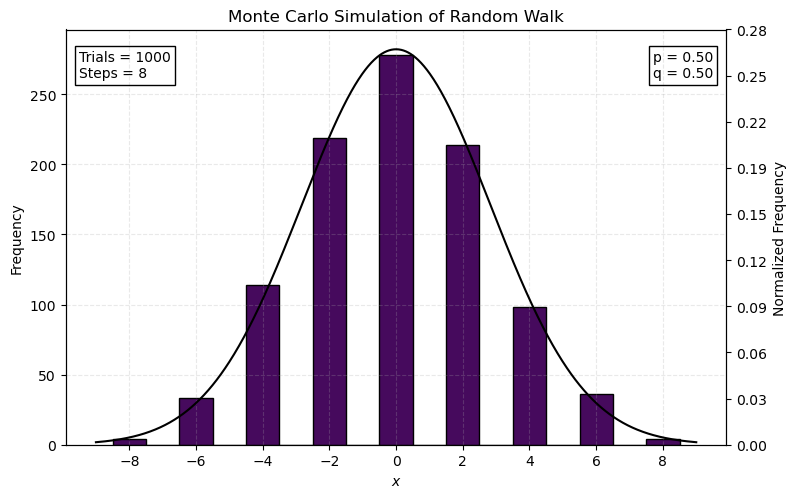

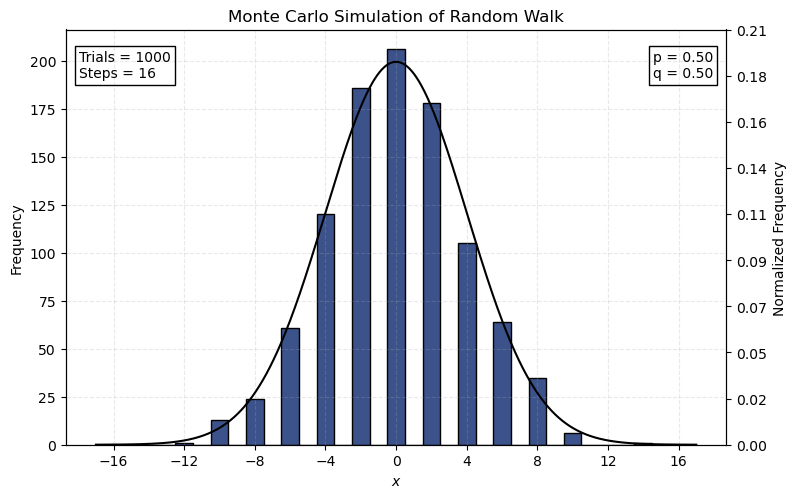

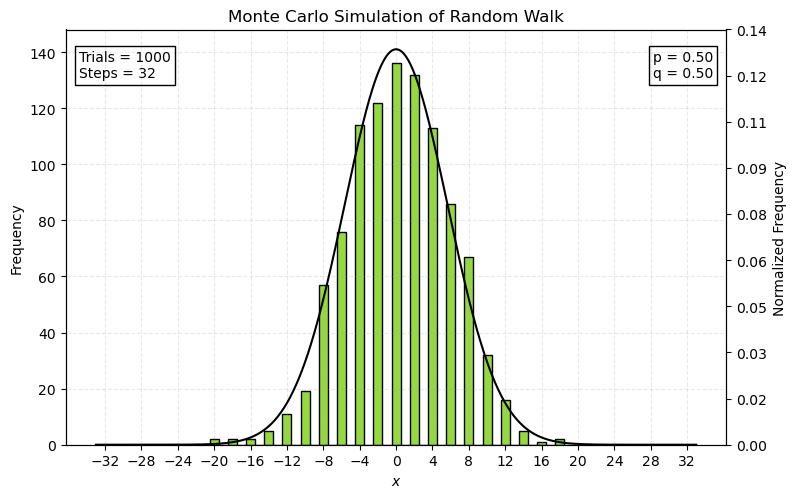

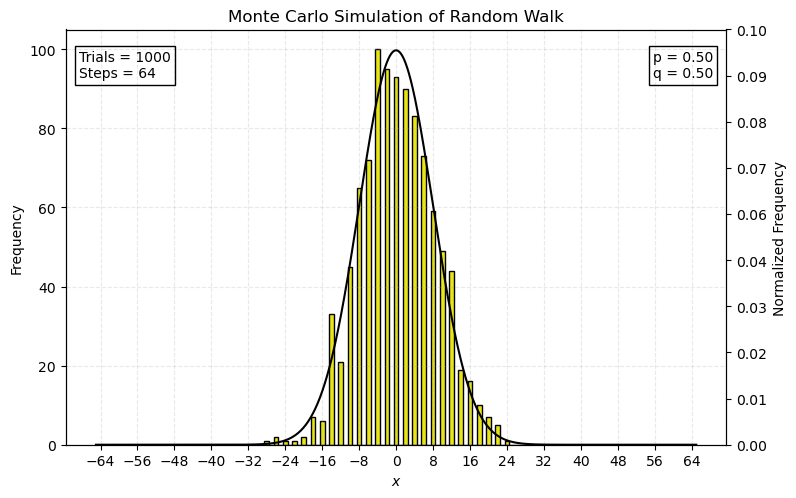

In [4]:
'''Set the data'''
num_trials = 1000  #number of trials for all simulations
num_steps1 = 8     #number of steps for first simulation
num_steps2 = 16    #number of steps for second simulation
num_steps3 = 32    #number of steps for third simulation
num_steps4 = 64    #number of steps for fourth simulation
p = 0.5            #probability of moving right
q = 1 - p          #probability of moving left

'''Conduct the Monte Carlo simulations for larger values of N'''
sim1 = bernoulli_processes()
sim1.monte_carlo(num_trials, num_steps1, p, q)
sim2 = bernoulli_processes()
sim2.monte_carlo(num_trials, num_steps2, p, q)
sim3 = bernoulli_processes()
sim3.monte_carlo(num_trials, num_steps3, p, q)
sim4 = bernoulli_processes()
sim3.monte_carlo(num_trials, num_steps4, p, q)

##### As N increases for $p=1/2$, the histogram becomes more peaked.  Since there is an equal probability of moving left or right, we expect the displacement to be closer to zero on average for a large number of steps.  For a large enough number of trials, there will be trials where the displacement is large, which means the width of the histogram increases slightly.  However, the height of the histogram increases much more for small displacement, such that the relative width of the histogram decreases and appears more peaked.

#### 3.36 (d) What is the most probable value of $x$ for $p=1/2$ and $N=16$ and $N=32$?  What is the approximate width of the distribution?  Estimate the width visually.  One way to do so is to determine the value of $x$ at which the value of the histogram is one-half of its maximum value.  How does the width change as a function of $N$ for fixed $p$?

##### The most probable value of $x$ for $p=1/2$ and $N=16$ and $N=32$ is $x=0$.  For a large number of trials and a large number of steps, we would expect the displacement to be close to zero on average since there is an equal chance to move left or right.  By estimating when the value of the histogram is one-half of its maximum, we find the widths of the four plots to be approximately 3, 4, 6, and 8, respectively.  We see that the width seems to grow at the rate of $\sqrt{N}$, so the width increases for larger $N$ at a fixed $p$.  However, the histogram becomes much sharper for larger $N$, which is consistent with the fact that the relative width is given by $\sigma_x/\bar{x}=1/\sqrt{N}$ for $p=1/2$.

#### 3.36 (e) How does the histogram change, if at all, as the number of walkers increases for $N=4$?

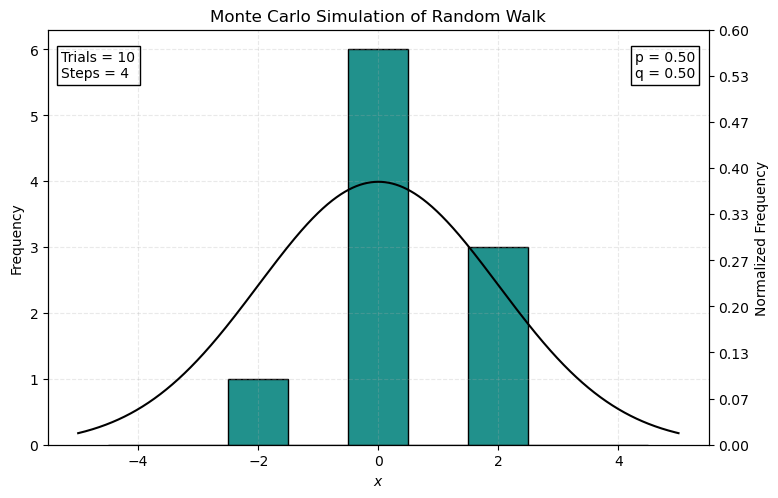

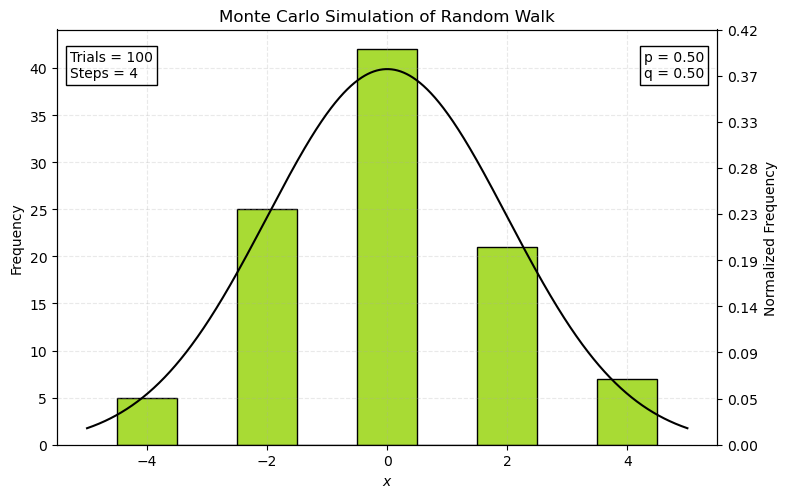

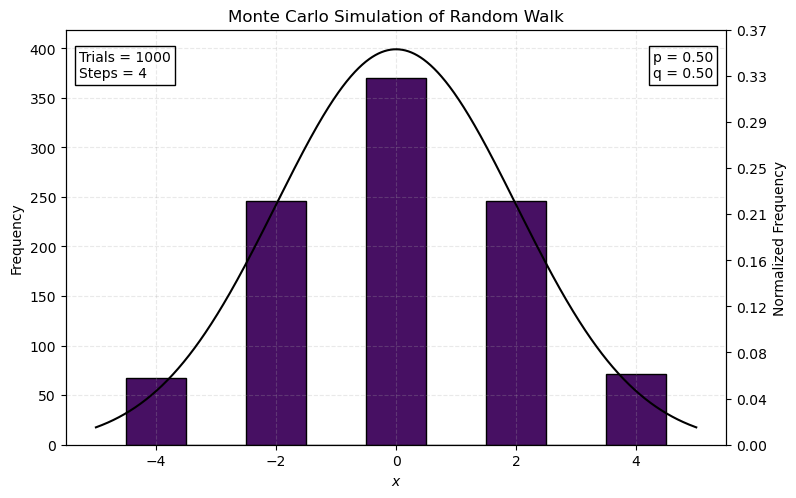

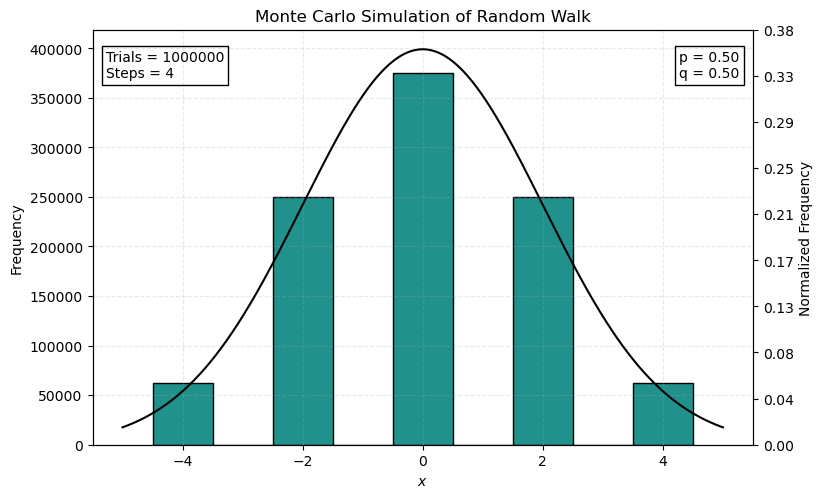

In [5]:
'''Set the data'''
num_trials1 = 10       #number of trials for first simulation
num_trials2 = 100      #number of trials for second simulation
num_trials3 = 1000     #number of trials for third simulation
num_trials4 = 1000000  #number of trials for fourth simulation
num_steps = 4          #number of steps for all simulations
p = 0.5                #probability of moving right
q = 1 - p              #probability of moving left

'''Conduct the Monte Carlo simulations for larger values of N'''
sim1 = bernoulli_processes()
sim1.monte_carlo(num_trials1, num_steps, p, q)
sim2 = bernoulli_processes()
sim2.monte_carlo(num_trials2, num_steps, p, q)
sim3 = bernoulli_processes()
sim3.monte_carlo(num_trials3, num_steps, p, q)
sim4 = bernoulli_processes()
sim3.monte_carlo(num_trials4, num_steps, p, q)

##### As the number of trials increases, the histogram becomes more uniform.  For 10 trials, we see almost random heights for the histogram and cannot get meaningful probabilities or statistics.  However, for upwards of 1000 trials, we see the histogram begins to perfectly match the Gaussian distribution, which demonstrates the Central Limit Theorem.

#### 3.70 (a) Suppose that a curious observer finds that on ten successive nights the walker takes $N=20$ steps and that the values of $n$ are given sucessively by 14, 13, 11, 12, 11, 12, 16, 16, 14, 8.  Calculate $\bar{n}$, $\bar{n^2}$, and $\sigma_n$.  You can use this information to make two estimates for $p$, which estimate is likely to be the most accurate?

Data:
Steps to the right each night = [14, 13, 11, 12, 11, 12, 16, 16, 14, 8]
Total displacement each night = [8, 6, 2, 4, 2, 4, 12, 12, 8, -4]

Calculations:
First Moment (average of n) = 12.70
Second Moment (average of n^2) = 166.70
Standard Deviation of n = 2.33
Relative Width of Distribution = 0.18

Estimates:
Guess 1: p = 0.64
Guess 2: p = 0.50+0.14j or 0.50-0.14j


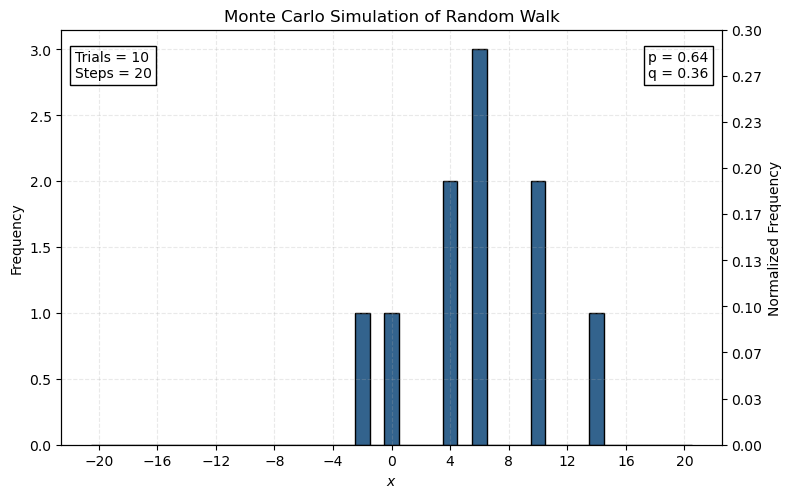

In [6]:
'''Recorded data'''
num_trials_a = 10                                     #number of trials
num_steps_a = 20                                      #total number of steps
n_list_a = [14, 13, 11, 12, 11, 12, 16, 16, 14, 8]    #number of steps to the right
m_list_a = [(2 * n) - num_steps_a for n in n_list_a]  #total displacement
print('Data:')
print('Steps to the right each night =', n_list_a)
print('Total displacement each night =', m_list_a)
print()

'''Calculations'''
moment1_a = np.average(n_list_a)                  #first moment (average of n)
moment2_a = np.average([n**2 for n in n_list_a])  #second moment (average of n**2)
std_a = np.sqrt(moment2_a - moment1_a**2)         #standard deviation of n
width_a = std_a / moment1_a                       #relative width of distribution
print('Calculations:')
print(f'First Moment (average of n) = {moment1_a:.2f}')
print(f'Second Moment (average of n^2) = {moment2_a:.2f}')
print(f'Standard Deviation of n = {std_a:.2f}')
print(f'Relative Width of Distribution = {width_a:.2f}')
print()

'''Probability p estimates'''
guess1_a = moment1_a / num_steps_a  #nbar = pN
coeff_a = [1, -1, (std_a**2) / num_steps_a]  #p^2 - p - (variance / N)
guess2_a = np.roots(coeff_a)
print('Estimates:')
print(f'Guess 1: p = {guess1_a:.2f}')
print(f'Guess 2: p = {guess2_a[0]:.2f} or {guess2_a[1]:.2f}')

'''Monte Carlo simulation for the problem'''
sim = bernoulli_processes()
sim.monte_carlo(num_trials_a, num_steps_a, guess1_a, 1 - guess1_a, distribution = False)

##### We have two formulae to estimate the value of $p$, such that $p=\bar{n}/N$ and $p^2-p+(\sigma_n)^2/N=0$.  The roots of the quadratic formula are complex, so these cannot be valid.  Therefore, we should use the value of $p$ given in terms of the average number of steps to the right $\bar{n}$.  If we compare the computed histogram for these parameters to the given displacements, we see that this estimation of $p$ is reasonable.

#### 3.70 (b) Suppose that on another ten successive nights the same walker takes $N=100$ steps and that the values of $n$ are given by 58, 69, 71, 58, 63, 53, 64, 66, 65, 50.  Calculate the same quantities as in part (a) and use this information to estimate $p$.  How does the ratio of $\sigma_n$ to $\bar{n}$ compare for the two values of $N$?  Explain your results.

Data:
Steps to the right each night = [58, 69, 71, 58, 63, 53, 64, 66, 65, 50]
Total displacement each night = [16, 38, 42, 16, 26, 6, 28, 32, 30, 0]

Calculations:
First Moment (average of n) = 61.70
Second Moment (average of n^2) = 3848.50
Standard Deviation of n = 6.45
Relative Width of Distribution = 0.10

Estimates:
Guess 1: p = 0.62
Guess 2: p = 0.50+0.41j or 0.50-0.41j


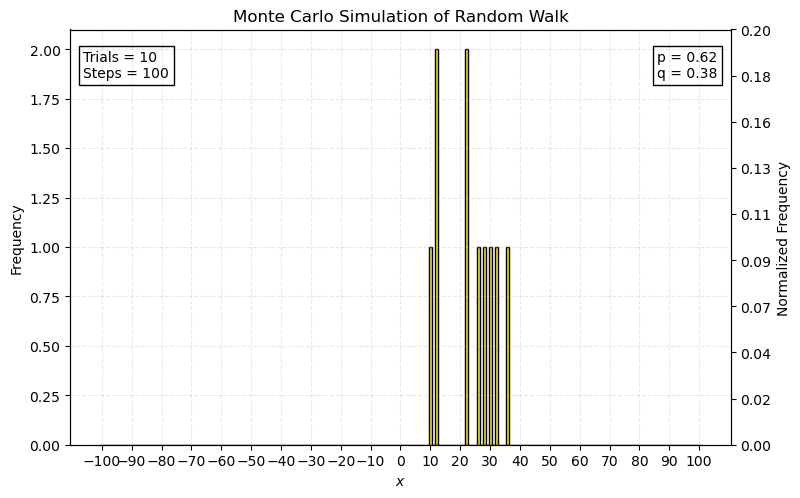

In [7]:
'''Recorded data'''
num_trials_b = 10                                     #number of trials
num_steps_b = 100                                     #total number of steps
n_list_b = [58, 69, 71, 58, 63, 53, 64, 66, 65, 50]   #number of steps to the right
m_list_b = [(2 * n) - num_steps_b for n in n_list_b]  #total displacement
print('Data:')
print('Steps to the right each night =', n_list_b)
print('Total displacement each night =', m_list_b)
print()

'''Calculations'''
moment1_b = np.average(n_list_b)                  #first moment (average of n)
moment2_b = np.average([n**2 for n in n_list_b])  #second moment (average of n**2)
std_b = np.sqrt(moment2_b - moment1_b**2)         #standard deviation of n
width_b = std_b / moment1_b                       #relative width of distribution
print('Calculations:')
print(f'First Moment (average of n) = {moment1_b:.2f}')
print(f'Second Moment (average of n^2) = {moment2_b:.2f}')
print(f'Standard Deviation of n = {std_b:.2f}')
print(f'Relative Width of Distribution = {width_b:.2f}')
print()

'''Probability p estimates'''
guess1_b = moment1_b / num_steps_b  #nbar = pN
coeff_b = [1, -1, (std_b**2) / num_steps_b]  #p^2 - p - (variance / N)
guess2_b = np.roots(coeff_b)
print('Estimates:')
print(f'Guess 1: p = {guess1_b:.2f}')
print(f'Guess 2: p = {guess2_b[0]:.2f} or {guess2_b[1]:.2f}')

'''Monte Carlo simulation for the problem'''
sim = bernoulli_processes()
sim.monte_carlo(num_trials_b, num_steps_b, guess1_b, 1 - guess1_b, distribution = False)

##### The ratio of $\sigma_n$ to $n$, defined as the relative width of the distribution, decreases as the number of steps increases from 20 to 100.  The histogram for $N=100$ appears to be more peaked than that of $N=20$.  Since there are more steps taken, we should find the histogram to be sharper around the expected value of the displacement.

#### 3.70 (c) Calculate $\bar{m}$ and $\sigma_m$, where $m\equiv n-n^{\prime}$ is the net displacement of the walker for parts (a) and (b).

In [8]:
'''Part (a)'''
m_avg_a = np.average(m_list_a)
m_std_a = np.std(m_list_a)
print('Part (a):')
print(f'Average of m = {m_avg_a:.2f}')
print(f'Standard Deviation of m = {m_std_a:.2f}')
print()

'''Part (b)'''
m_bvg_b = np.average(m_list_b)
m_std_b = np.std(m_list_b)
print('Part (b):')
print(f'Average of m = {m_bvg_b:.2f}')
print(f'Standard Deviation of m = {m_std_b:.2f}')

Part (a):
Average of m = 5.40
Standard Deviation of m = 4.65

Part (b):
Average of m = 23.40
Standard Deviation of m = 12.90
